In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# load data
# LR
lr_df = pd.read_csv('resultLR.csv')
# RF
rf_df = pd.read_csv('resultRF.csv')
# SVM
svm_df = pd.read_csv('resultSVM.csv')


In [20]:
res = pd.concat([lr_df, rf_df, svm_df], axis=0)
res.head()

,Unnamed: 0,relationship,trend,surface_level,spatial_autocorrelation,algorithm,spatial_autocorrelation_val,bandwidth,Coordinates,No_coordinates,Add_coordinates_change,Geographical,Geographical_change,Multiscale,Multiscale_change
0,0,linear,none,small,high,LinearRegression,0.867794,40.0,0.127601,0.127593,-0.006090,0.127747,-0.120684,0.128521,-0.726807
1,1,linear,none,small,low,LinearRegression,0.578114,30.0,0.140615,0.140659,0.031499,0.141285,-0.444826,0.142011,-0.961300
2,2,linear,none,small,none,LinearRegression,0.115965,40.0,0.181095,0.181165,0.039032,0.181342,-0.097450,0.183655,-1.373943
3,3,polynom2,none,small,high,LinearRegression,0.841694,5.0,0.457738,0.438557,-4.373720,0.153204,65.066415,0.170800,61.053997
4,4,polynom2,none,small,low,LinearRegression,0.302382,5.0,0.421287,0.423325,0.481331,0.277788,34.379431,0.289793,31.543514


### General 

In [32]:
melted = pd.melt(res, id_vars=['algorithm'], value_vars=['Add_coordinates_change', 'Geographical_change', 'Multiscale_change'])
melted.head()

,algorithm,variable,value
0,LinearRegression,Add_coordinates_change,-0.006090
1,LinearRegression,Add_coordinates_change,0.031499
2,LinearRegression,Add_coordinates_change,0.039032
3,LinearRegression,Add_coordinates_change,-4.373720
4,LinearRegression,Add_coordinates_change,0.481331


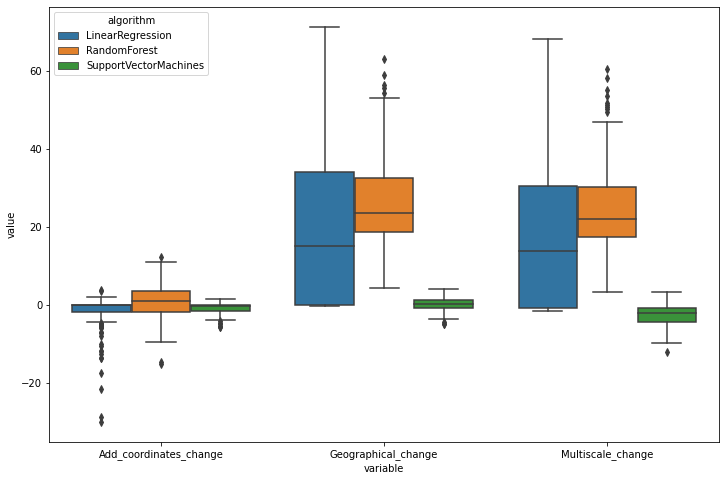

In [31]:
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(ax=ax, data=melted, x="variable", y="value", hue="algorithm", orient='v')

### Trend

In [45]:
res_trend = res.drop(res[res.trend == 'none'].index)
res_trend_1 =  pd.melt(res, id_vars=['algorithm', 'surface_level'], value_vars=['Geographical_change'])
res_trend_2 =  pd.melt(res, id_vars=['algorithm', 'surface_level'], value_vars=['Multiscale_change'])

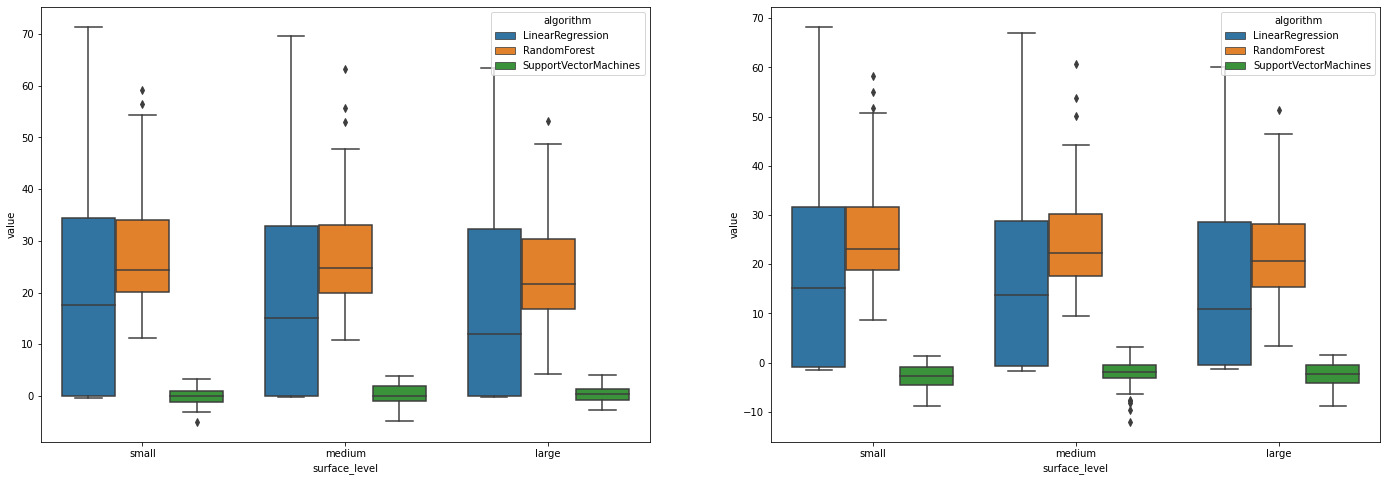

In [48]:
fig, ax = plt.subplots(figsize=(24,8), nrows=1, ncols=2)

sns.boxplot(ax=ax[0], data=res_trend_1, x="surface_level", y="value", hue="algorithm", orient='v')
sns.boxplot(ax=ax[1], data=res_trend_2, x="surface_level", y="value", hue="algorithm", orient='v')

### Complexness

In [49]:
res_rel =  pd.melt(res, id_vars=['algorithm', 'relationship'], value_vars=['Geographical_change'])

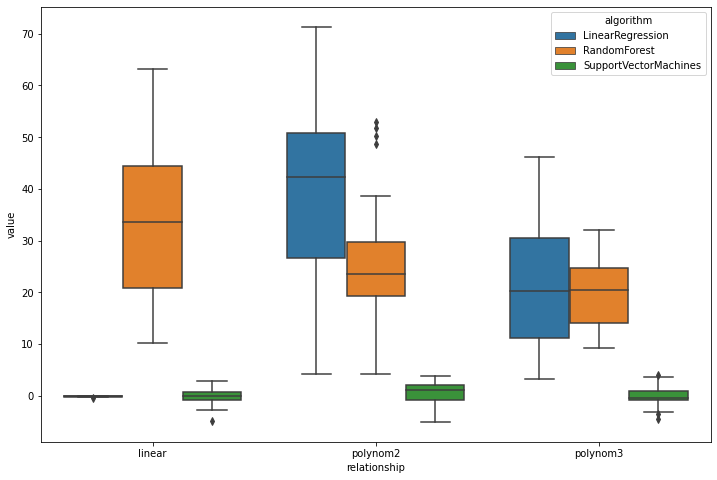

In [134]:
fig, ax = plt.subplots(figsize=(12,8), nrows=1, ncols=1)
sns.boxplot(ax=ax, data=res_rel, x="relationship", y="value", hue="algorithm", orient='v')

### Spatial Autocorrelation

In [116]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
names = ['0', '0.2', '0.4', '0.6', '0.8']

res['SAC'] = pd.cut(res['spatial_autocorrelation_val'], bins, labels=names)
res_sac_1 =  pd.melt(res, id_vars=['algorithm', 'relationship', 'SAC'], value_vars=['Geographical_change'])

res_sac_1_lr = res_sac_1.loc[res_sac_1['algorithm'] == 'LinearRegression']
res_sac_1_lr.drop(columns=['algorithm', 'variable'], inplace=True)

res_sac_1_rf = res_sac_1.loc[res_sac_1['algorithm'] == 'RandomForest']
res_sac_1_rf.drop(columns=['algorithm', 'variable'], inplace=True)

res_sac_1_svm = res_sac_1.loc[res_sac_1['algorithm'] == 'SupportVectorMachines']
res_sac_1_svm.drop(columns=['algorithm', 'variable'], inplace=True)

ht_lr = pd.pivot_table(res_sac_1_lr, values='value', index=['relationship'], columns=['SAC'], aggfunc="mean")
ht_rf = pd.pivot_table(res_sac_1_rf, values='value', index=['relationship'], columns=['SAC'], aggfunc="mean")
ht_svm = pd.pivot_table(res_sac_1_svm, values='value', index=['relationship'], columns=['SAC'], aggfunc="mean")
#

Text(0.5, 1.0, 'SVM')

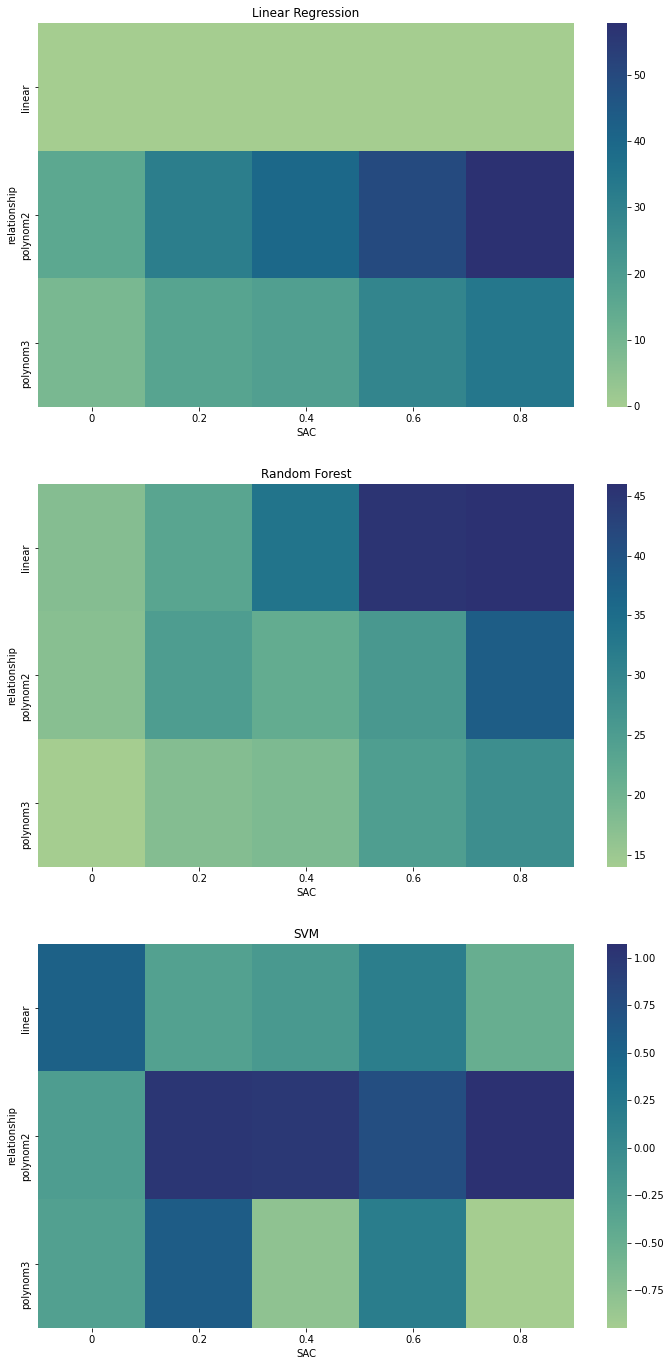

In [140]:
fig, axes = plt.subplots(figsize=(12,24), nrows=3, ncols=1)

sns.heatmap(ht_lr, cmap="crest", ax=axes[0])
sns.heatmap(ht_rf, cmap="crest", ax=axes[1])
sns.heatmap(ht_svm, cmap="crest", ax=axes[2])

axes[0].set_title('Linear Regression')
axes[1].set_title('Random Forest')
axes[2].set_title('SVM')

In [146]:
res_sac_g = pd.melt(res, id_vars=['algorithm', 'spatial_autocorrelation_val'], value_vars=['Geographical_change'])

In [151]:
res_sac_g_lr = res_sac_g.loc[res_sac_g['algorithm'] == 'LinearRegression']
res_sac_g_rf = res_sac_g.loc[res_sac_g['algorithm'] == 'RandomForest']
res_sac_g_svm = res_sac_g.loc[res_sac_g['algorithm'] == 'SupportVectorMachines']

Text(0.5, 1.0, 'SupportVectorMachines')

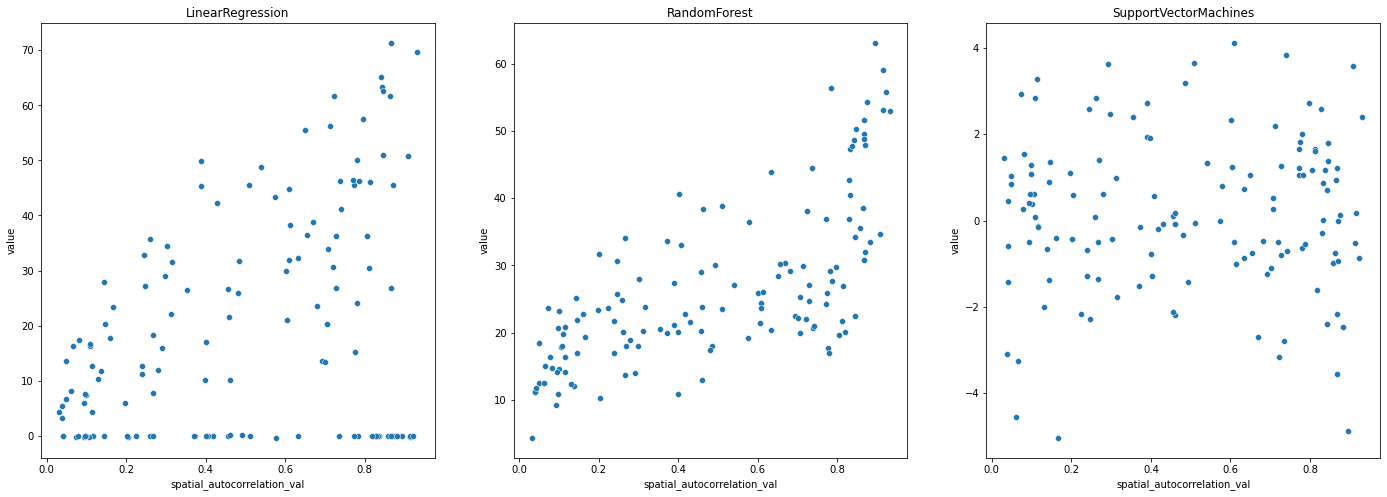

In [154]:
fig, axes = plt.subplots(figsize=(24,8), nrows=1, ncols=3)

sns.scatterplot(data=res_sac_g_lr, x="spatial_autocorrelation_val", y="value", ax=axes[0])
sns.scatterplot(data=res_sac_g_rf, x="spatial_autocorrelation_val", y="value", ax=axes[1])
sns.scatterplot(data=res_sac_g_svm, x="spatial_autocorrelation_val", y="value", ax=axes[2])

axes[0].set_title('LinearRegression')
axes[1].set_title('RandomForest')
axes[2].set_title('SupportVectorMachines')

### Spatial Surface

In [162]:
res_surface_1 =  pd.melt(res, id_vars=['algorithm', 'trend'], value_vars=['Geographical_change'])
res_surface_2 =  pd.melt(res, id_vars=['algorithm', 'trend'], value_vars=['Multiscale_change'])

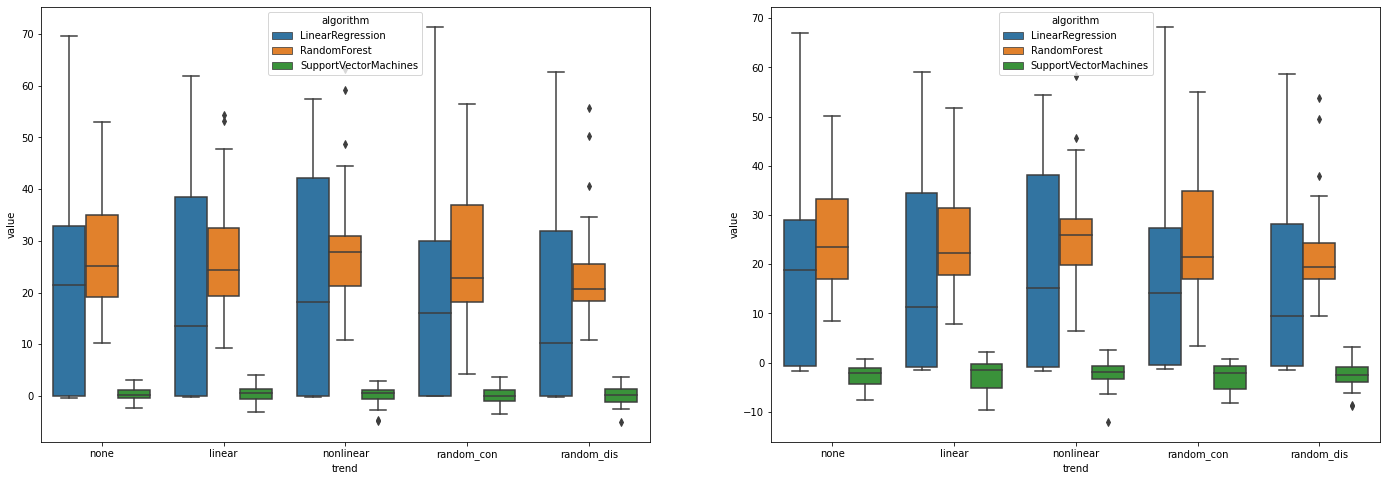

In [163]:
fig, ax = plt.subplots(figsize=(24,8), ncols=2, nrows=1)

sns.boxplot(ax=ax[0], data=res_surface_1, x="trend", y="value", hue="algorithm", orient='v')
sns.boxplot(ax=ax[1], data=res_surface_2, x="trend", y="value", hue="algorithm", orient='v')


In [161]:
res

,Unnamed: 0,relationship,trend,surface_level,spatial_autocorrelation,algorithm,spatial_autocorrelation_val,bandwidth,Coordinates,No_coordinates,Add_coordinates_change,Geographical,Geographical_change,Multiscale,Multiscale_change,SAC
0,0,linear,none,small,high,LinearRegression,0.867794,40.0,0.127601,0.127593,-0.006090,0.127747,-0.120684,0.128521,-0.726807,0.8
1,1,linear,none,small,low,LinearRegression,0.578114,30.0,0.140615,0.140659,0.031499,0.141285,-0.444826,0.142011,-0.961300,0.4
2,2,linear,none,small,none,LinearRegression,0.115965,40.0,0.181095,0.181165,0.039032,0.181342,-0.097450,0.183655,-1.373943,0
3,3,polynom2,none,small,high,LinearRegression,0.841694,5.0,0.457738,0.438557,-4.373720,0.153204,65.066415,0.170800,61.053997,0.8
4,4,polynom2,none,small,low,LinearRegression,0.302382,5.0,0.421287,0.423325,0.481331,0.277788,34.379431,0.289793,31.543514,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,130,polynom2,random_dis,large,low,SupportVectorMachines,0.509622,40.0,0.203198,0.202719,-0.236693,0.195314,3.652621,0.202453,0.130983,0.4
131,131,polynom2,random_dis,large,none,SupportVectorMachines,0.279793,40.0,0.285542,0.284580,-0.337802,0.282849,0.608214,0.293042,-2.973295,0.2
132,132,polynom3,random_dis,large,high,SupportVectorMachines,0.632974,40.0,0.430382,0.422743,-1.807234,0.426382,-0.860922,0.440652,-4.236426,0.6
133,133,polynom3,random_dis,large,low,SupportVectorMachines,0.460631,40.0,0.483577,0.473598,-2.106946,0.472813,0.165876,0.497709,-5.091032,0.4
